<a href="https://colab.research.google.com/github/alizard212/111A/blob/main/111A_lab4_4_2b_COLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 4.2 cold data.csv to 4.2 cold data (6).csv
Time (s)
Channel 1 (V)
Channel 2 (V)
fitted slope: 80.681
fitted intercept: -91.452
ideality factor: 1.869
saturation current: 1.92e-40A


/tmp/ipython-input-27-3572906668.py:21: RuntimeWarning: invalid value encountered in log
  lnID = np.log(ID)                     #natural log of current


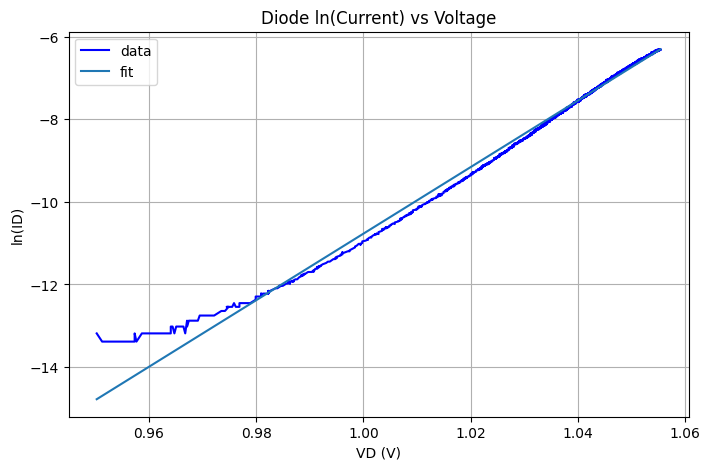

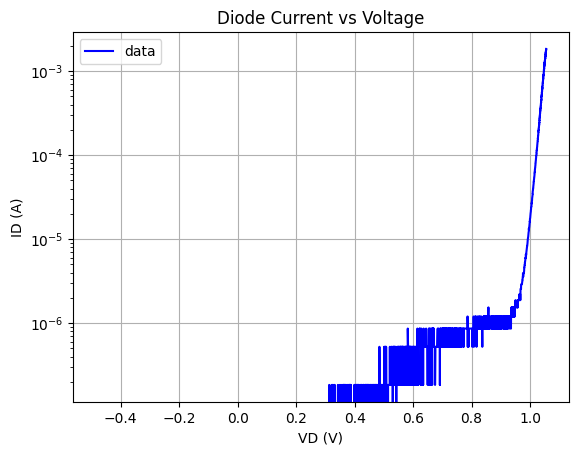

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from google.colab import files
uploaded = files.upload()

#load data
data = pd.read_csv("4.2 cold data.csv", skiprows = 19, encoding = 'ISO-8859-1')

for col in data.columns:
    print(col)

#column names "Channel 1 (V)" (V across resistor) and "Channel 2 (V)" (V across diode)
VR = data["Channel 1 (V)"].values     #voltage across resistor VR
VD = data["Channel 2 (V)"].values     #voltage across diode VD
R = 1000                              #1k ohm resistor

#calculate current
ID   = VR/R                           #current in amperes
lnID = np.log(ID)                     #natural log of current

#restrict to region where VD . 0.3V (and filter out negative values of ID)
VD_fit    = VD[(VD > 0.95) & (ID > 1e-8)]   #ID > 10e-8 for COLD, 0 for WARM
lnID_fit  = lnID[(VD > 0.95) & (ID >1e-8)]

#fit to linear model
def linear_model(VD, slope, intercept):
    return slope*VD + intercept

params, _ = curve_fit(linear_model, VD_fit, lnID_fit)
slope, intercept = params

#extract constants
k = 1.38e-23    #boltzmann constant [J/K]
q = 1.602e-19   #elementary charge [C]
T = 77         #room temp [K] (change to 77K for (e)!!)
VT = k*T/q      #thermal voltage

#constants of interest
n = 1/(slope * VT)
IS = np.exp(intercept)    #saturation current

#print results
print(f"fitted slope: {slope:.3f}")
print(f"fitted intercept: {intercept:.3f}")
print(f"ideality factor: {n:.3f}")
print(f"saturation current: {IS:.2e}A")

#plot graph
plt.figure(figsize=(8, 5))
plt.plot(VD_fit, lnID_fit, 'b', label='data')
plt.plot(VD_fit, linear_model(VD_fit, slope, intercept), label='fit')
plt.xlabel('VD (V)')
plt.ylabel('ln(ID)')
plt.title("Diode ln(Current) vs Voltage")
plt.legend()
plt.grid(True)
plt.show()

#diagnostic
plt.semilogy(VD, ID, 'b', label='data')
plt.xlabel('VD (V)')
plt.ylabel('ID (A)')
plt.title("Diode Current vs Voltage")
plt.legend()
plt.grid(True)
plt.show()

